# Using all the features of the dataset predict the charge

# Importing Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Reading Dataset

In [2]:
df = pd.read_csv('insurance.csv')

In [3]:
#Top 5 values of the dataset
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [4]:
#Number of columns and rows of Dataset
df.shape

(1338, 7)

In [5]:
# Display information about the DataFrame, including column names, data types, and memory usage
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [6]:
#Converting bmi column into int
df['bmi'] = df['bmi'].astype(int)

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   int32  
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(1), int32(1), int64(2), object(3)
memory usage: 68.1+ KB


In [8]:
#Checking for the null values
df.isnull().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

In [9]:
#Checking for unique values in region column
df['region'].unique()

array(['southwest', 'southeast', 'northwest', 'northeast'], dtype=object)

In [10]:
#Checking for unique values in smoker column
df['smoker'].unique()

array(['yes', 'no'], dtype=object)

# Data Cleaning¶
Checking for missing values

<AxesSubplot:>

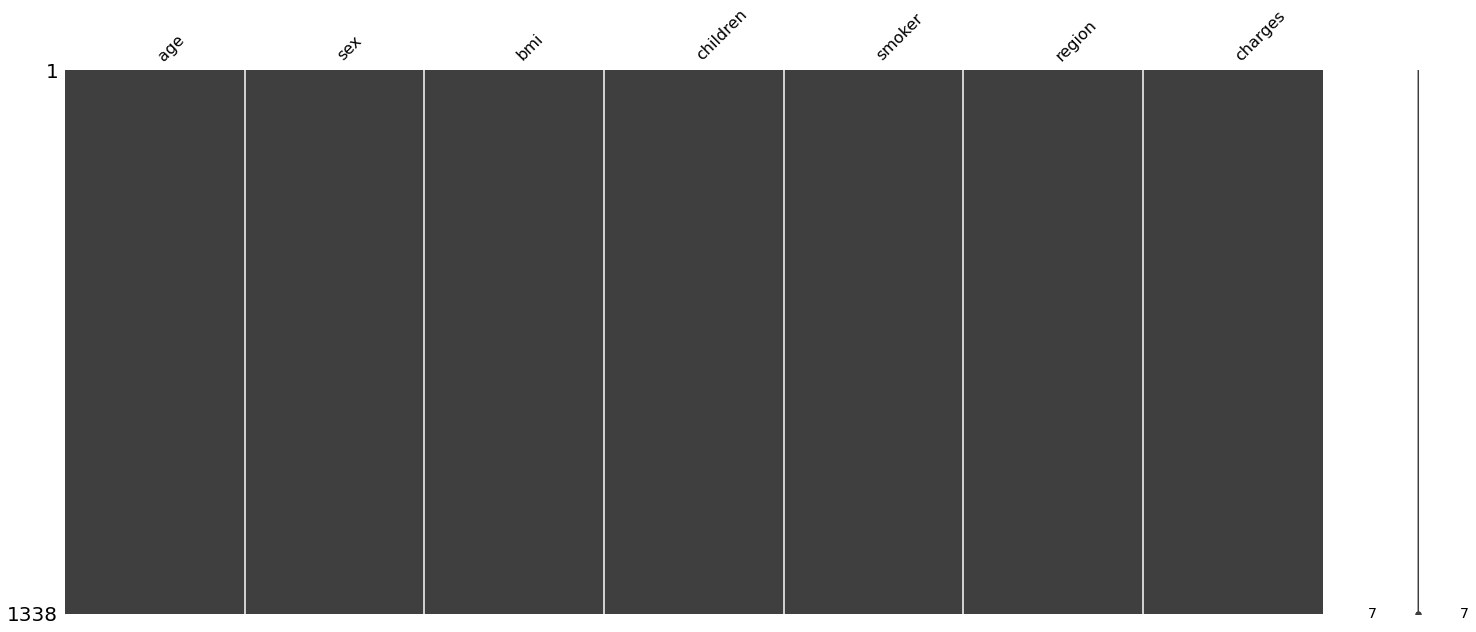

In [11]:
import missingno as msno 
msno.matrix(df)

Text(0, 0.5, 'Charges')

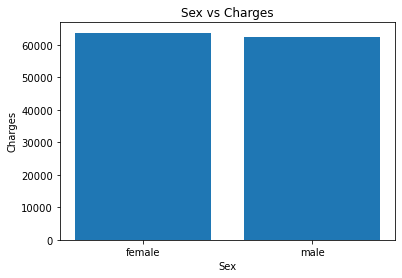

In [12]:
#Creating a bar graph of Sex vs Charges
plt.bar(df['sex'],df['charges'])
plt.title('Sex vs Charges')
plt.xlabel('Sex')
plt.ylabel('Charges')

Text(0.5, 1.0, 'Sex vs Charges')

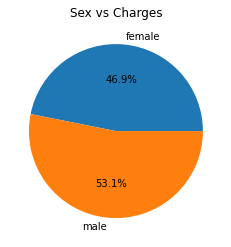

In [13]:
# Calculate the total charges for each sex
charges_by_sex = df.groupby('sex')['charges'].sum()

# Create the pie chart
plt.pie(charges_by_sex, labels=charges_by_sex.index, autopct='%1.1f%%')
plt.title('Sex vs Charges')

Text(0, 0.5, 'Charges')

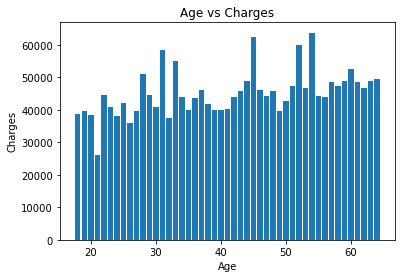

In [14]:
#Creating a bar graph of age vs Charges
plt.bar(df['age'],df['charges'])
plt.title('Age vs Charges')
plt.xlabel('Age')
plt.ylabel('Charges')

Text(0.5, 1.0, 'Region vs Charges')

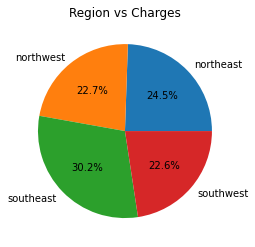

In [15]:
# Calculate the total charges for each region
charges_by_region = df.groupby('region')['charges'].sum()

# Create the pie chart
plt.pie(charges_by_region, labels=charges_by_region.index, autopct='%1.1f%%')
plt.title('Region vs Charges')

Text(0, 0.5, 'Charges')

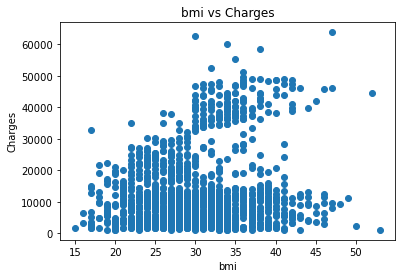

In [16]:
#Creating a bar graph of bmi vs Charges
plt.scatter(df['bmi'],df['charges'])
plt.title('bmi vs Charges')
plt.xlabel('bmi')
plt.ylabel('Charges')

# Converting Categorical variable into numeric values
->Converting Sex column & Smoker column using Label Encoder

->Converting Region column using One Hot Encoder

In [17]:
#Importing LabelEncoder & OneHotEncoder from sklearn.preprocessing
from sklearn.preprocessing import LabelEncoder, OneHotEncoder

In [18]:
#Creating Objects of LabelEncoder & OneHotEncoder
Le = LabelEncoder()
OHE = OneHotEncoder(sparse=False)

# LabelEncoder

In [19]:
df['smoker'] = Le.fit_transform(df['smoker'])

In [20]:
df['sex'] = Le.fit_transform(df['sex'])

# OneHotEncoder

In [21]:
df

,age,sex,bmi,children,smoker,region,charges
0,19,0,27,0,1,southwest,16884.92400
1,18,1,33,1,0,southeast,1725.55230
2,28,1,33,3,0,southeast,4449.46200
3,33,1,22,0,0,northwest,21984.47061
4,32,1,28,0,0,northwest,3866.85520
...,...,...,...,...,...,...,...
1333,50,1,30,3,0,northwest,10600.54830
1334,18,0,31,0,0,northeast,2205.98080
1335,18,0,36,0,0,southeast,1629.83350
1336,21,0,25,0,0,southwest,2007.94500


In [22]:
x=df['region'].values.reshape(-1,1)

# Create the OneHotEncoder object with the appropriate parameters

In [23]:

OHE = OneHotEncoder(sparse=False)  # Set sparse to False

# Fit and transform the encoded features
encoded_features = OHE.fit_transform(x)


C:\Users\Ankit\anaconda3\lib\site-packages\sklearn\preprocessing\_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


In [24]:
# Check the type of the encoded features
if isinstance(encoded_features, np.ndarray):
    # Handle NumPy array
    new_columns = OHE.get_feature_names_out(['feature_name'])
elif isinstance(encoded_features, scipy.sparse.csr_matrix):
    # Handle sparse matrix
    new_columns = OHE.get_feature_names_out(['feature_name']).tolist()
else:
    raise ValueError("Unexpected type for encoded features")

print(new_columns)

['feature_name_northeast' 'feature_name_northwest'
 'feature_name_southeast' 'feature_name_southwest']


In [25]:
# Create a new DataFrame with the encoded features

In [26]:

df_encoded = pd.DataFrame(encoded_features, columns=new_columns) 

# Concatenate the original DataFrame and the encoded DataFrame

In [27]:

df = pd.concat([df,df_encoded],axis=1)

In [28]:
df.head()

,age,sex,bmi,children,smoker,region,charges,feature_name_northeast,feature_name_northwest,feature_name_southeast,feature_name_southwest
0,19,0,27,0,1,southwest,16884.92400,0.0,0.0,0.0,1.0
1,18,1,33,1,0,southeast,1725.55230,0.0,0.0,1.0,0.0
2,28,1,33,3,0,southeast,4449.46200,0.0,0.0,1.0,0.0
3,33,1,22,0,0,northwest,21984.47061,0.0,1.0,0.0,0.0
4,32,1,28,0,0,northwest,3866.85520,0.0,1.0,0.0,0.0


In [29]:
df.drop(columns='region',axis=1,inplace=True)

In [30]:
df.head()

,age,sex,bmi,children,smoker,charges,feature_name_northeast,feature_name_northwest,feature_name_southeast,feature_name_southwest
0,19,0,27,0,1,16884.92400,0.0,0.0,0.0,1.0
1,18,1,33,1,0,1725.55230,0.0,0.0,1.0,0.0
2,28,1,33,3,0,4449.46200,0.0,0.0,1.0,0.0
3,33,1,22,0,0,21984.47061,0.0,1.0,0.0,0.0
4,32,1,28,0,0,3866.85520,0.0,1.0,0.0,0.0


In [31]:
#Checking the name of the total columns present in df
df.columns

Index(['age', 'sex', 'bmi', 'children', 'smoker', 'charges',
       'feature_name_northeast', 'feature_name_northwest',
       'feature_name_southeast', 'feature_name_southwest'],
      dtype='object')

# Applying RobustScaler for correct data outliers

In [32]:
from sklearn.preprocessing import RobustScaler
import numpy as np

# Assuming 'data' is the array-like object containing your data

# Create the RobustScaler object
scaler = RobustScaler()

# Fit the scaler to your data
scaler.fit(df[['charges']])

RobustScaler()

In [34]:


# Transform the data using the scaler
df['charges'] = scaler.transform(df[['charges']])

# Alternatively, you can fit and transform in one step
df['charges'] = scaler.fit_transform(df[['charges']])

# Print the scaled data
print(df['charges'])


0       0.630515
1      -0.643422
2      -0.414515
3       1.059062
4      -0.463475
          ...   
1333    0.102399
1334   -0.603049
1335   -0.651466
1336   -0.619691
1337    1.660500
Name: charges, Length: 1338, dtype: float64


# Creating the independent variable(X) and dependent variable(y)

In [35]:
# Extract features (X) and target variable (y)
X = df[['age', 'sex', 'bmi', 'children', 'smoker', 'feature_name_southwest', 'feature_name_southeast', 'feature_name_northwest']]
y = df['charges']

In [36]:
# Convert X and y to numpy arrays
X = np.array(X)
y = np.array(y)

# Splitting the data set into train and test using train_test_split from sklearn.model_selection

In [37]:
from sklearn.model_selection import train_test_split

Creating X_train,X_test,y_train and y_test we will set test_size = 0.2 so 20% of the actual data will be used as test data

In [38]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2)

In [39]:
print('X_train_shape: ',X_train.shape)
print('y_train_shape: ',y_train.shape)
print('X_test_shape: ',X_test.shape)
print('y_test_shape: ',y_test.shape)

X_train_shape:  (1070, 8)
y_train_shape:  (1070,)
X_test_shape:  (268, 8)
y_test_shape:  (268,)


# Standardising the data using StandardScaler

In [40]:
from sklearn.preprocessing import StandardScaler

# Creating the object of StandardScaler

In [41]:

SD = StandardScaler()

In [42]:
X_train_SD = SD.fit_transform(X_train)

In [43]:
X_test_SD = SD.transform(X_test)

In [44]:
X_mean = X_train_SD.mean(axis=0)

In [45]:
y_mean = y_train.mean(axis=0)

In [46]:
num = 0
dim = 0
epsilon = 1e-8  
for i in range(len(X_train_SD)):
    num += (X_train_SD[i] - X_mean) * (y_train[i] - y_mean)
    dim += (X_train_SD[i] - X_mean) ** 2

coff = num / (dim + epsilon)
inter = y_mean - (coff * X_mean)
print('Coff:', coff)
print('Intercept:', inter)

Coff: [ 0.32919524  0.05281268  0.20698181  0.08773509  0.81995872 -0.03419637
  0.08214149 -0.05477675]
Intercept: [0.33437815 0.33437815 0.33437815 0.33437815 0.33437815 0.33437815
 0.33437815 0.33437815]


In [47]:
m = coff
c = inter
y = m * 11 + c
z = m * 95644.50 + c
print('y:', y)
print('z:', z)

y: [ 3.95552574  0.91531762  2.61117807  1.29946418  9.3539241  -0.0417819
  1.23793453 -0.26816607]
z: [31486.04808099  5051.57665414 19797.00616881  8391.71356924
 78424.87639365 -3270.36015439  7856.71601608 -5238.76025353]


# Evaluate the model on the test set

In [48]:

y_pred = X_test_SD.dot(coff)
mse = np.mean((y_pred - y_test) ** 2)
mae = np.mean(np.abs(y_pred - y_test))
r2 = 1 - (np.sum((y_test - y_pred) ** 2) / np.sum((y_test - y_test.mean()) ** 2))

print('Mean Squared Error (MSE):', mse)
print('Mean Absolute Error (MAE):', mae)
print('R-squared:', r2)

Mean Squared Error (MSE): 0.43387142546335
Mean Absolute Error (MAE): 0.48485892855720497
R-squared: 0.5138960490815556


# Visualize the results

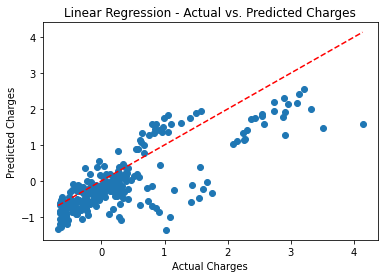

In [49]:

plt.scatter(y_test, y_pred)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')
plt.xlabel('Actual Charges')
plt.ylabel('Predicted Charges')
plt.title('Linear Regression - Actual vs. Predicted Charges')
plt.show()